In [93]:
import gym
import numpy as np

import cv2

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [71]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Prototyper
from piaget import init_env, play

In [72]:
random_seed = 0
np.random.seed(random_seed)
env = gym.make('AssaultNoFrameskip-v3'); num_wait_steps = 1;

[2017-07-11 20:00:18,963] Making new env: AssaultNoFrameskip-v3


In [73]:
num_steps = 30
img_dir = 'img/'
mt_dir = 'mt/'
mt = play(num_steps, env, img_dir, mt_dir, num_wait_steps, 1)

RuntimeWarning: Degrees of freedom <= 0 for slice

** Put the next cell in piaget

In [ ]:
import matplotlib.colors as mcolors
box_colors_rgb = np.array([mcolors.hex2color(v) for v in mcolors.cnames.values()]).reshape((1,147, 3))
box_colors_hsv = mcolors.rgb_to_hsv(box_colors_rgb)
good_indices = (box_colors_hsv[0][:,1] > 0.5) & (box_colors_hsv[0][:,2] < 0.8)

box_colors = box_colors_rgb[0][good_indices]

** Put the next cell in piaget


 Frame: 0


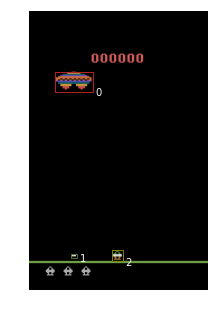


 Frame: 1


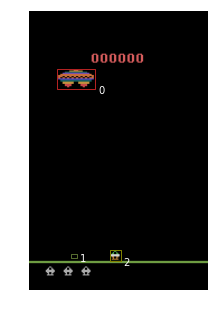


 Frame: 2


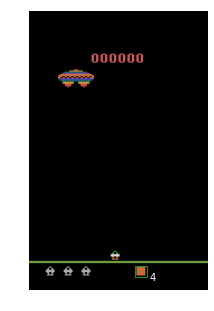


 Frame: 3


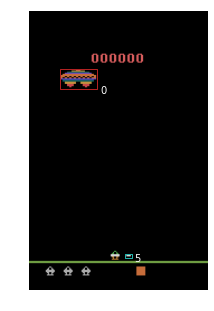


 Frame: 4


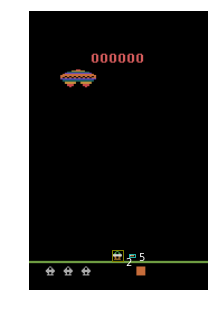


 Frame: 5


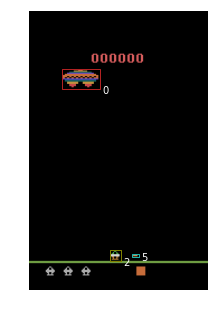


 Frame: 6


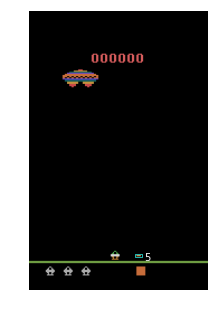


 Frame: 7


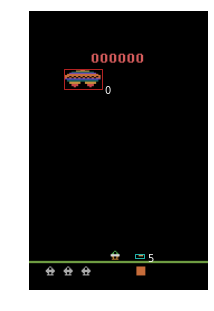


 Frame: 8


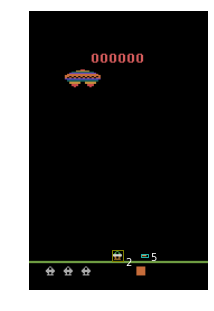


 Frame: 9


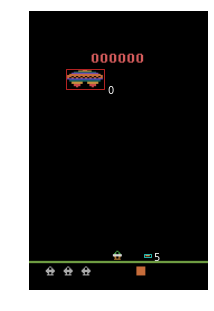


 Frame: 10


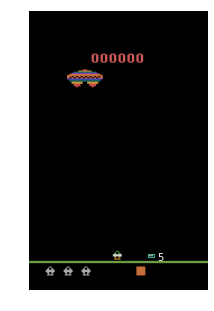


 Frame: 11


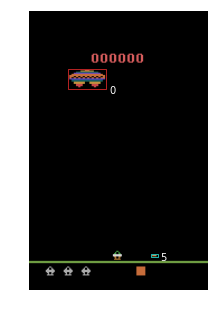


 Frame: 12


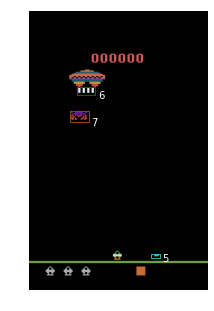


 Frame: 13


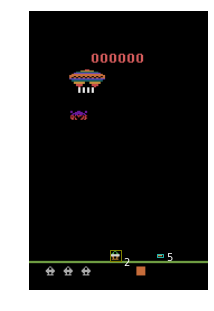


 Frame: 14


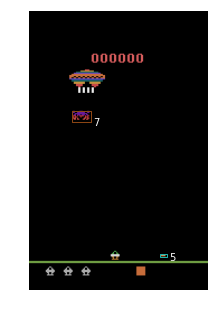


 Frame: 15


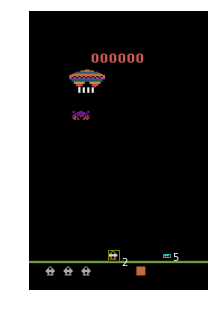


 Frame: 16


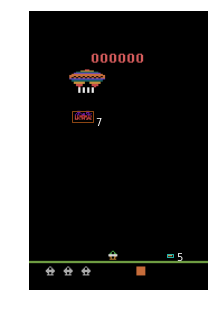


 Frame: 17


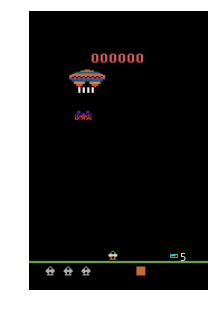


 Frame: 18


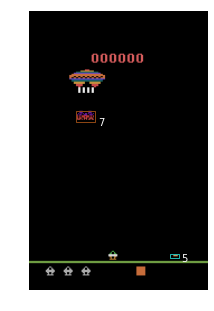


 Frame: 19


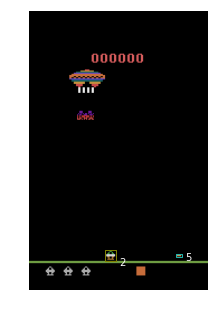


 Frame: 20


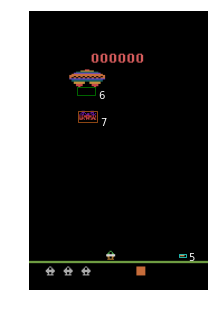


 Frame: 21


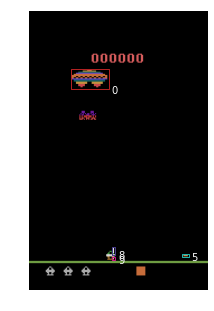


 Frame: 22


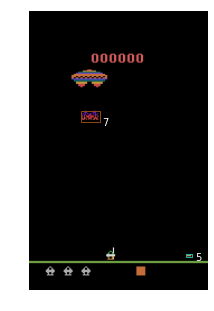


 Frame: 23


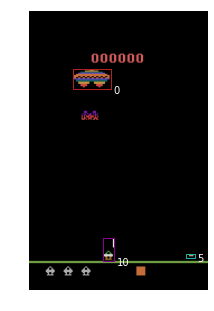


 Frame: 24


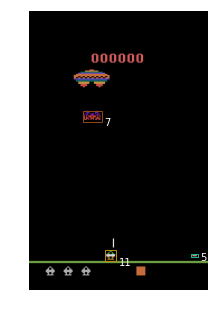


 Frame: 25


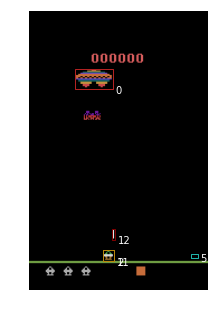


 Frame: 26


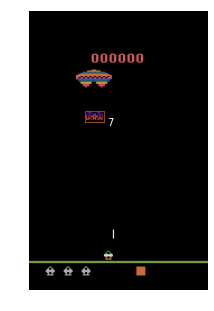


 Frame: 27


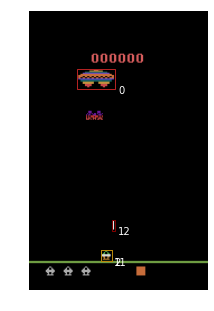


 Frame: 28


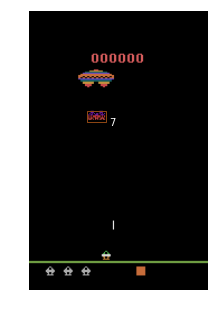


 Frame: 29


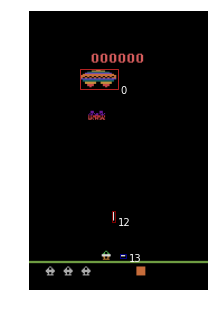


 Frame: 30


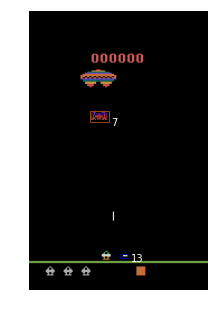

In [90]:
fp = mt.frame_pairs

for i in range(mt.cur_frame):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
        
    ax = plt.gca()
    plt.axis('off')
    if i == 0:
        plt.imshow(fp[i].s0)
    else:
        plt.imshow(fp[i-1].s1)
    for data in movers_cur_frame:
        m_id = data[0]
        box = data[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[(m_id+1) % len(box_colors)],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()

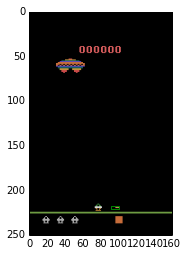

In [100]:
ii = 5

finder = fp[ii].finder
plt.imshow(fp[ii].s1)
ax = plt.gca()
for cnt in finder.cnts:
    (x, y, w, h) = cv2.boundingRect(cnt)
    ax.add_patch(patches.Rectangle((x, y),
                                w, h,
                                color='g',
                                fill=False)
        )
plt.show()

In [78]:
finder.cnts_joined

[(37-43, 217-221),
 (72-84, 214-224),
 (23-59, 52-72),
 (37-72, 214-221),
 (23-43, 52-221),
 (23-84, 52-224),
 (23-72, 52-221)]

array([[[ 37, 217]],

       [[ 37, 220]],

       [[ 42, 220]],

       [[ 42, 217]]], dtype=int32)